In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')
display(data.shape)
data.head()

(9134, 24)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [4]:
data.columns = data.columns.str.lower().str.replace(' ', '_')
data.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [5]:
data['effective_to_date'] = pd.to_datetime(data['effective_to_date'])

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       9134 non-null   object        
 1   state                          9134 non-null   object        
 2   customer_lifetime_value        9134 non-null   float64       
 3   response                       9134 non-null   object        
 4   coverage                       9134 non-null   object        
 5   education                      9134 non-null   object        
 6   effective_to_date              9134 non-null   datetime64[ns]
 7   employmentstatus               9134 non-null   object        
 8   gender                         9134 non-null   object        
 9   income                         9134 non-null   int64         
 10  location_code                  9134 non-null   object        
 11  marital_status   

In [7]:
data.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [8]:
import pandas as pd

def num_cat_seperator(data):
    num_data = pd.DataFrame(data.select_dtypes(include='number'))
    cat_data = pd.DataFrame(data.select_dtypes(include='object'))
    return num_data, cat_data

num_data, cat_data = num_cat_seperator(data)

print("Numerical Columns:")
print(num_data)

print("\nCategorical Columns:")
print(cat_data)

Numerical Columns:
      customer_lifetime_value  income  monthly_premium_auto  \
0                 2763.519279   56274                    69   
1                 6979.535903       0                    94   
2                12887.431650   48767                   108   
3                 7645.861827       0                   106   
4                 2813.692575   43836                    73   
...                       ...     ...                   ...   
9129             23405.987980   71941                    73   
9130              3096.511217   21604                    79   
9131              8163.890428       0                    85   
9132              7524.442436   21941                    96   
9133              2611.836866       0                    77   

      months_since_last_claim  months_since_policy_inception  \
0                          32                              5   
1                          13                             42   
2                          18   

In [9]:
cat_data = cat_data.drop(['customer'], axis=1)
cat_data

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [10]:
correlations_matrix = num_data.corr()
correlations_matrix

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
monthly_premium_auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
months_since_last_claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
months_since_policy_inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
number_of_open_complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
number_of_policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
total_claim_amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


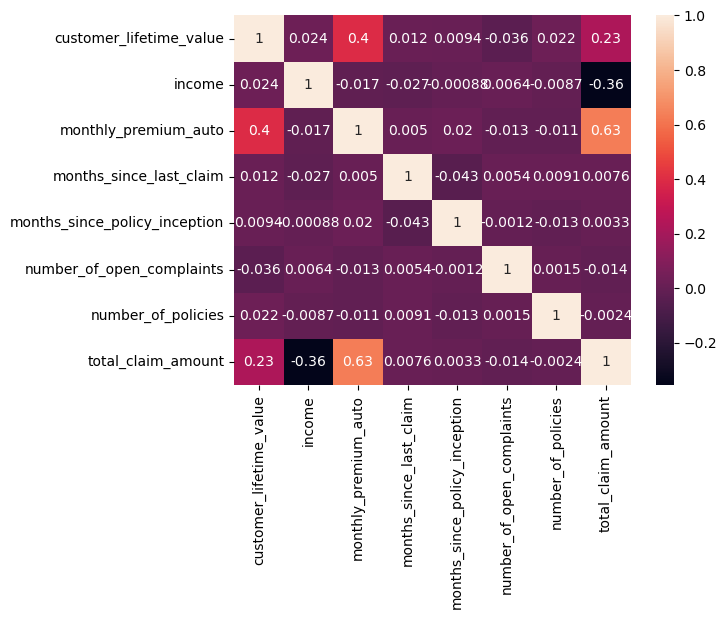

In [11]:
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [12]:
# monthly_premium_auto and total_claim_amount showed the highest correlation

In [13]:
def separate_continuous_discrete(data, unique_threshold=36):
    continuous_df = pd.DataFrame()
    discrete_df = pd.DataFrame()
    
    # Loop through columns in the input DataFrame
    for col in data.columns:
        if data[col].nunique() > unique_threshold:
            # If number of unique values is greater than threshold, consider it as continuous
            continuous_df[col] = data[col]
        else:
            # Otherwise, consider it as discrete
            discrete_df[col] = data[col]
    
    return continuous_df, discrete_df

continuous_df, discrete_df = separate_continuous_discrete(num_data)

print("Continuous Columns:")
print(continuous_df)

print("\nDiscrete Columns:")
print(discrete_df)

Continuous Columns:
      customer_lifetime_value  income  monthly_premium_auto  \
0                 2763.519279   56274                    69   
1                 6979.535903       0                    94   
2                12887.431650   48767                   108   
3                 7645.861827       0                   106   
4                 2813.692575   43836                    73   
...                       ...     ...                   ...   
9129             23405.987980   71941                    73   
9130              3096.511217   21604                    79   
9131              8163.890428       0                    85   
9132              7524.442436   21941                    96   
9133              2611.836866       0                    77   

      months_since_policy_inception  total_claim_amount  
0                                 5          384.811147  
1                                42         1131.464935  
2                                38          566.

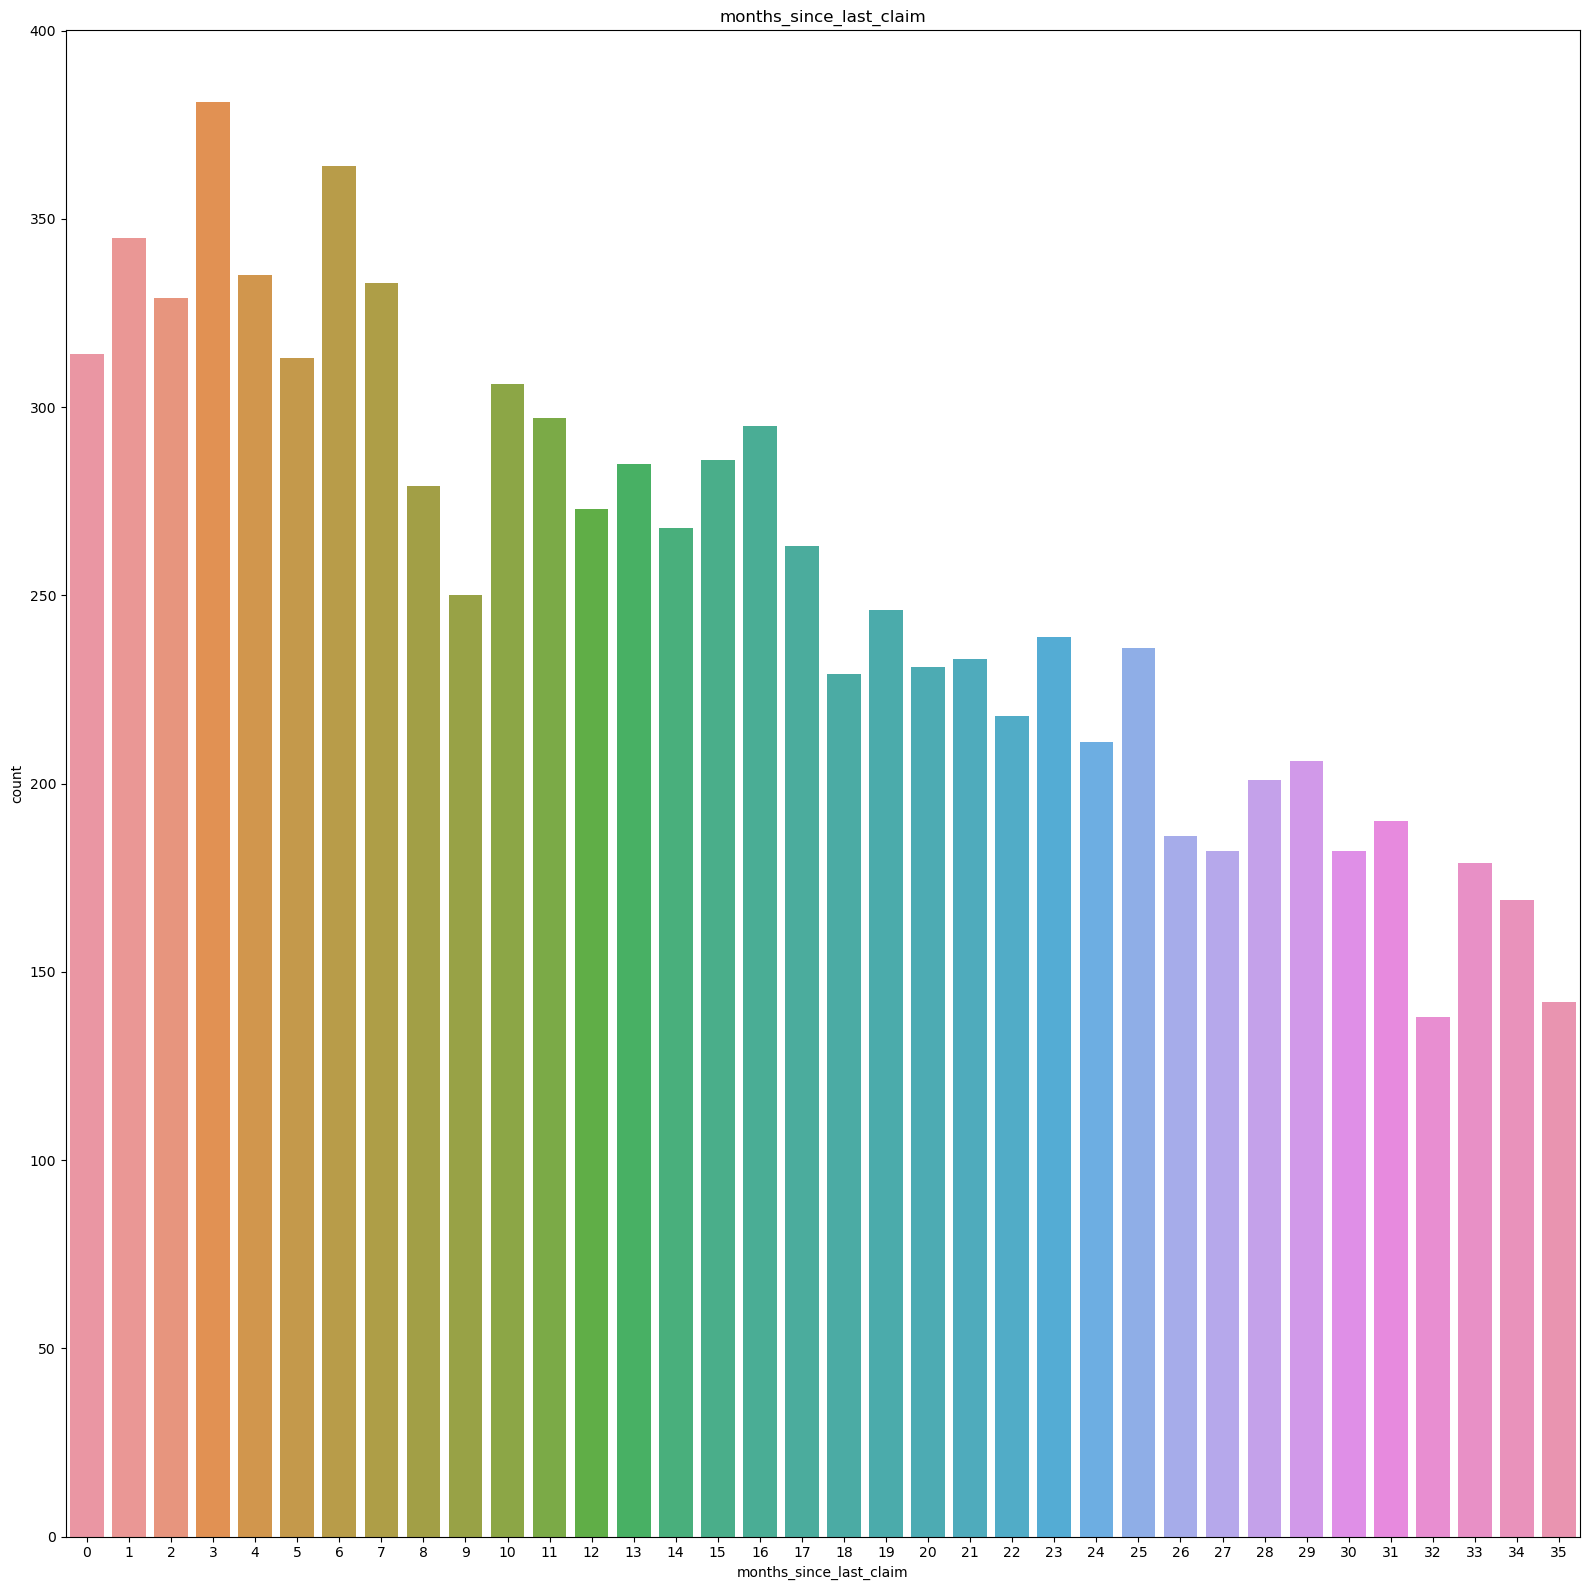

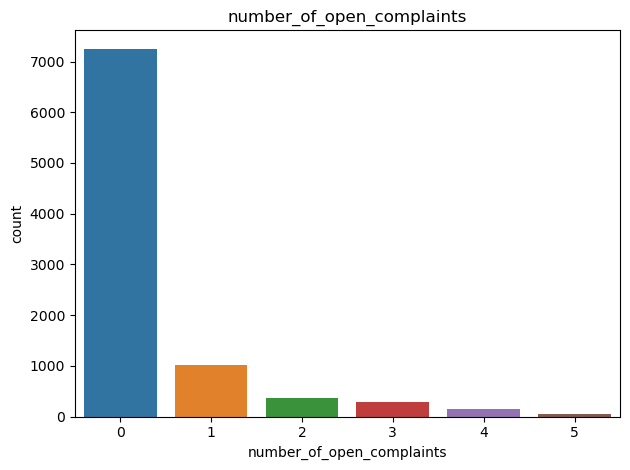

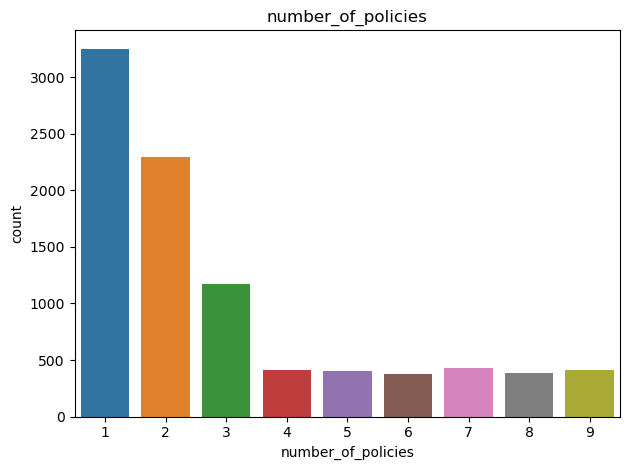

In [14]:
def create_discrete_barplots(df):
    # Set figure size
    plt.figure(figsize=(16, 16))

    # Loop through columns in the DataFrame
    for col in df.columns:
        # Create bar plot using seaborn
        sns.countplot(x=col, data=df)
        plt.title(col)
        plt.tight_layout()
        plt.show()

create_discrete_barplots(discrete_df)

<Figure size 1600x1600 with 0 Axes>

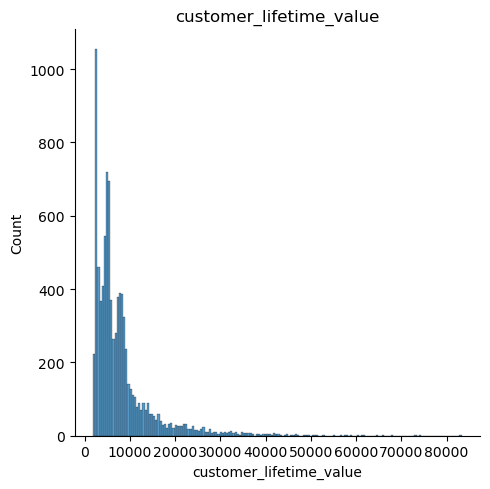

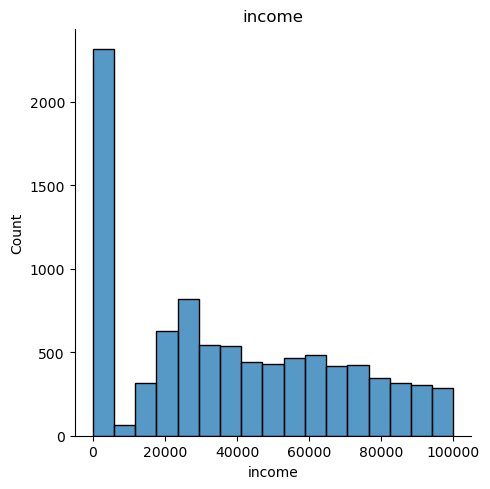

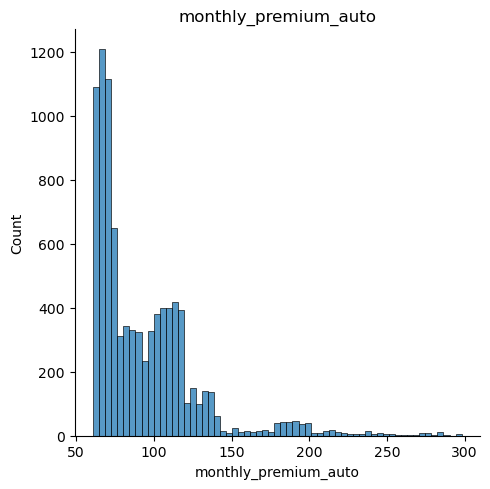

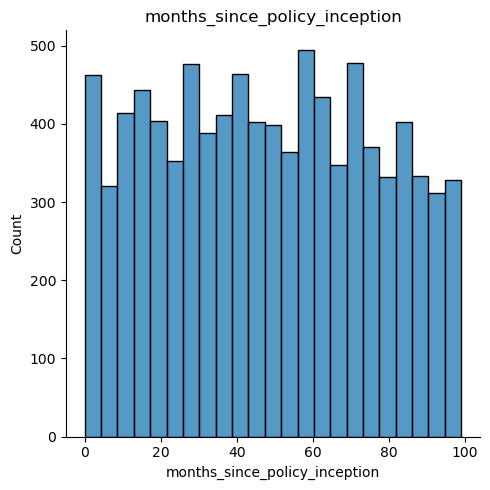

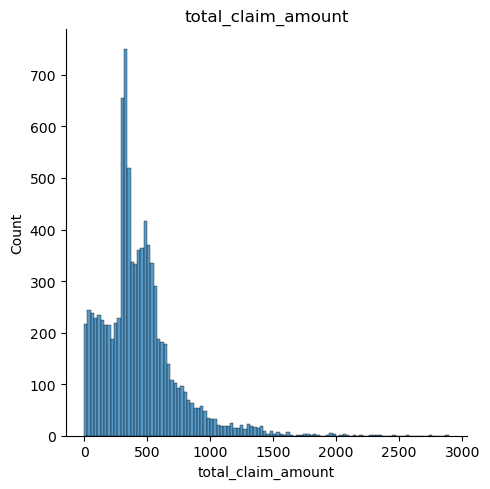

In [15]:
def create_discrete_histplots(df):
    # Set figure size
    plt.figure(figsize=(16, 16))

    # Loop through columns in the DataFrame
    for col in df.columns:
        # Create bar plot using seaborn
        sns.displot(x=col, data=df)
        plt.title(col)
        plt.tight_layout()
        plt.show()

create_discrete_histplots(continuous_df)

In [16]:
# They are not normally distributed, so transforemrs needs to be applied

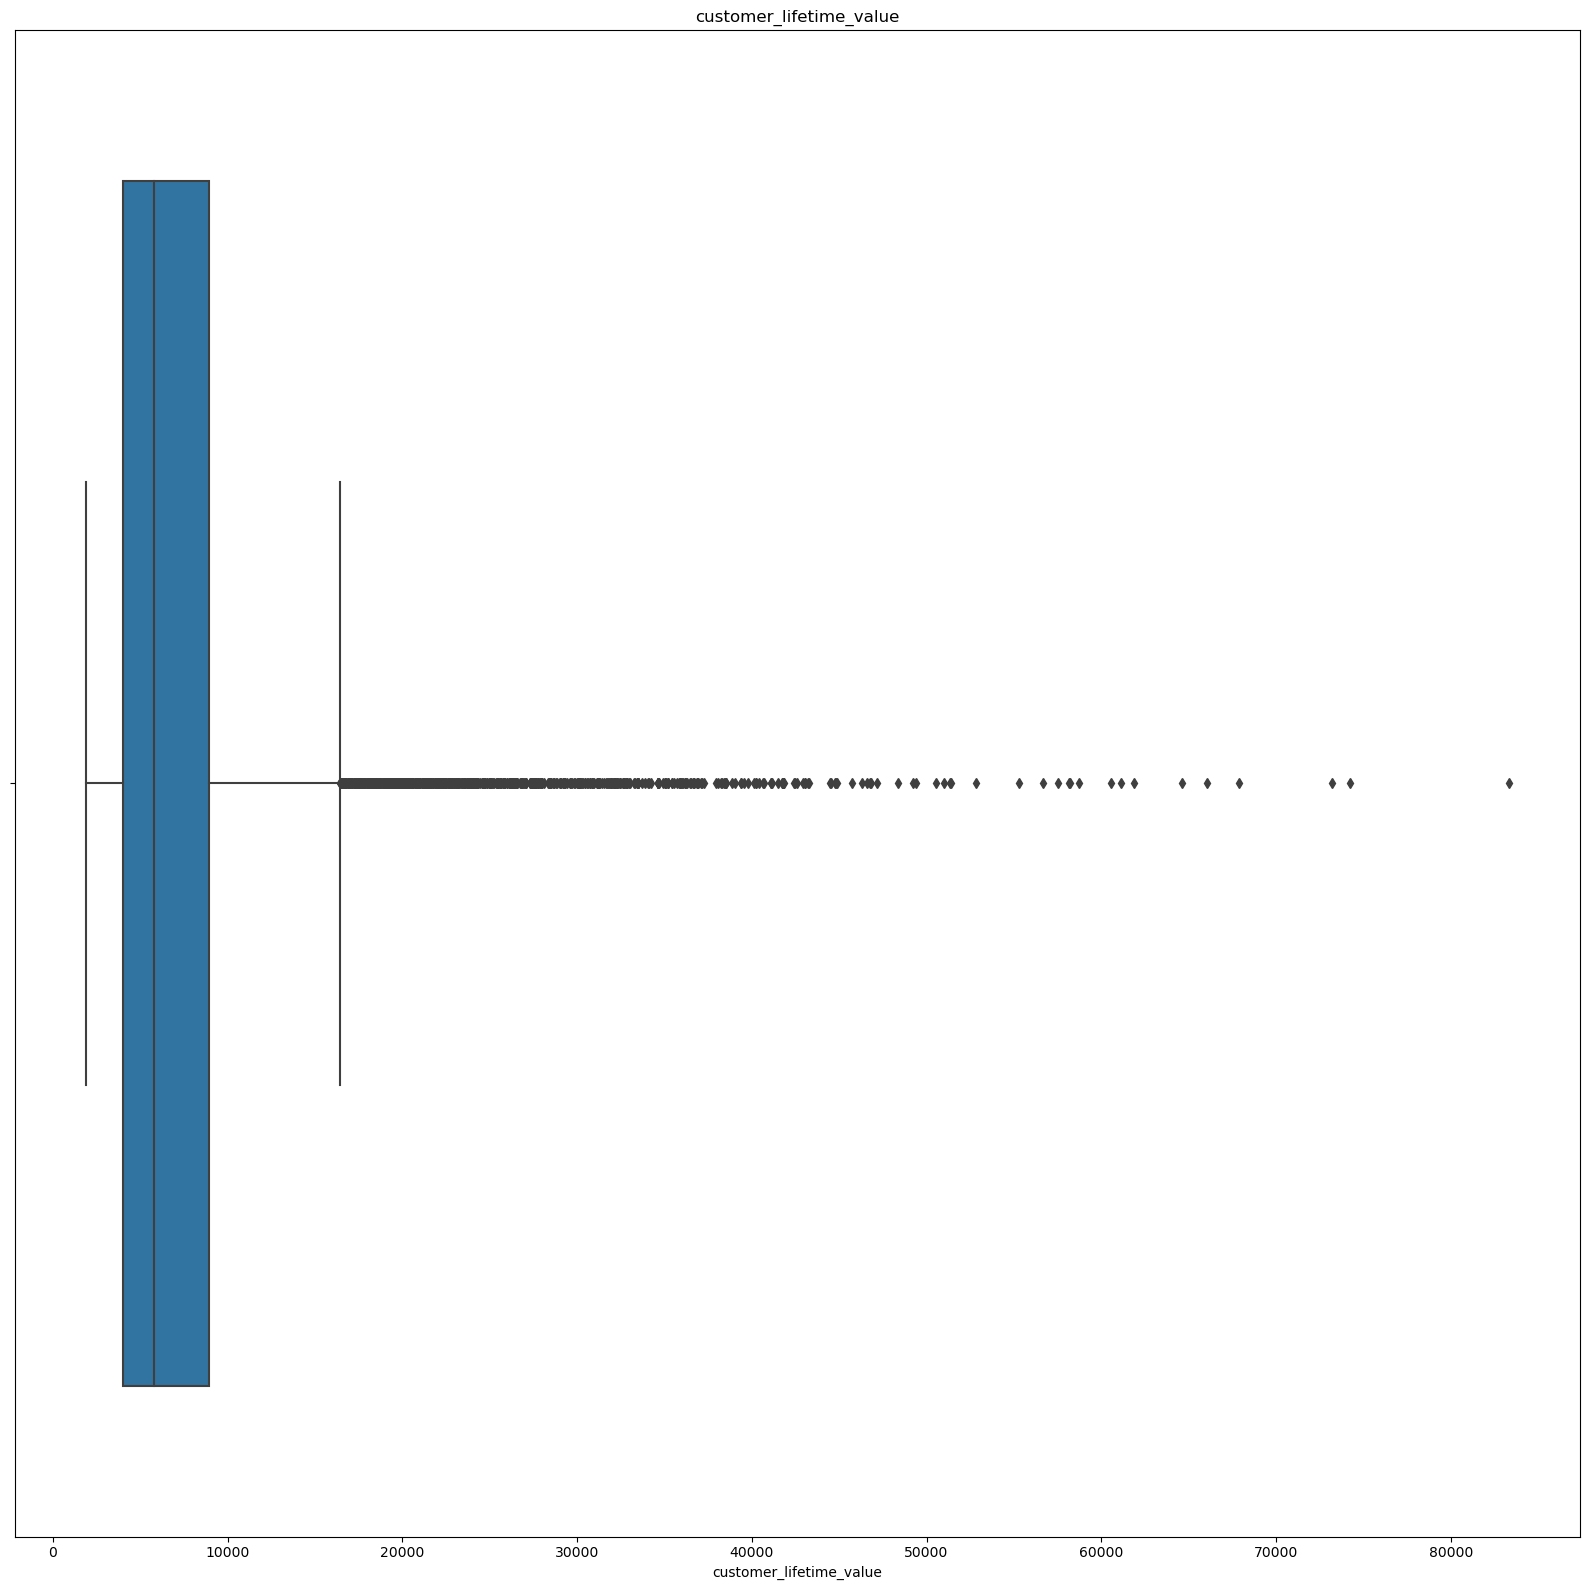

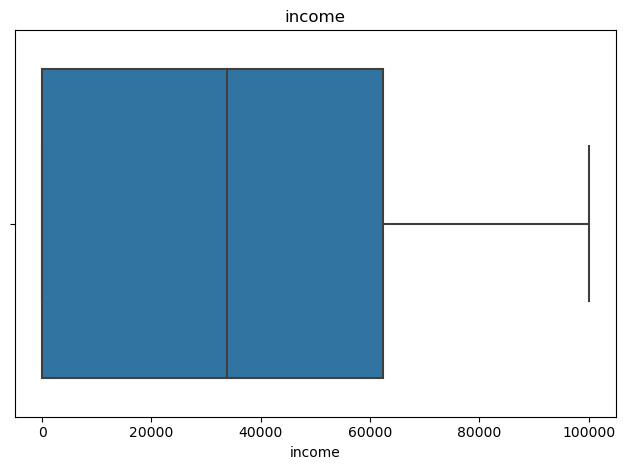

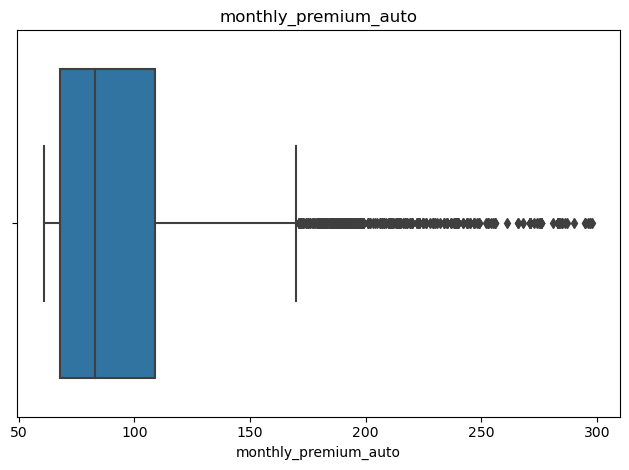

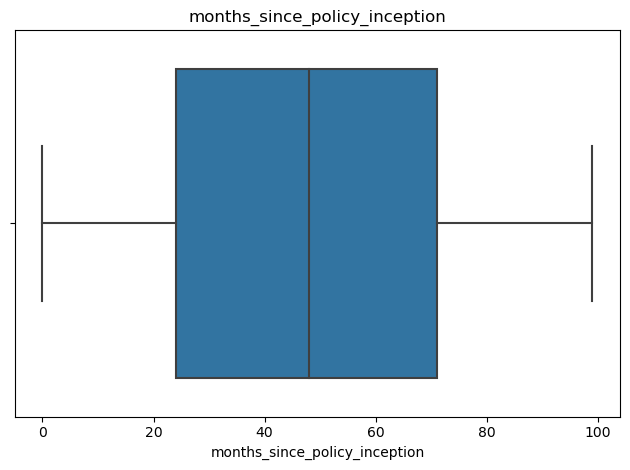

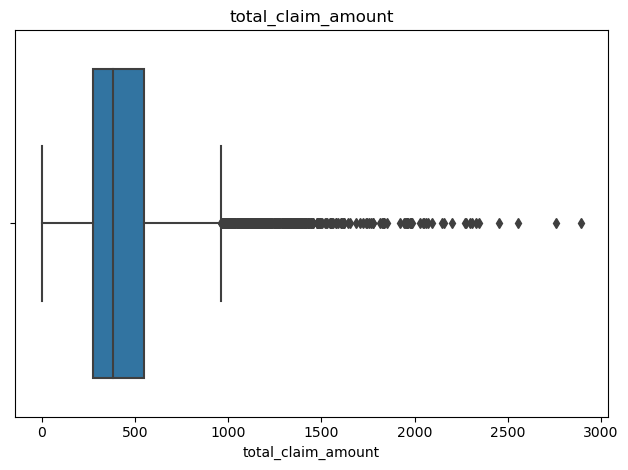

In [17]:
def create_discrete_boxplots(df):
    # Set figure size
    plt.figure(figsize=(16, 16))

    # Loop through columns in the DataFrame
    for col in df.columns:
        # Create bar plot using seaborn
        sns.boxplot(x=col, data=df)
        plt.title(col)
        plt.tight_layout()
        plt.show()

create_discrete_boxplots(continuous_df)

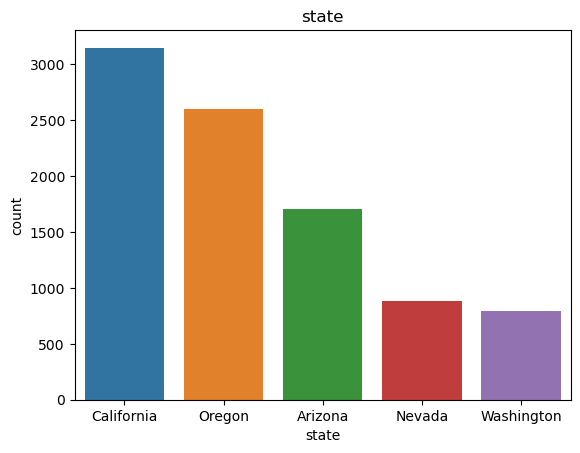

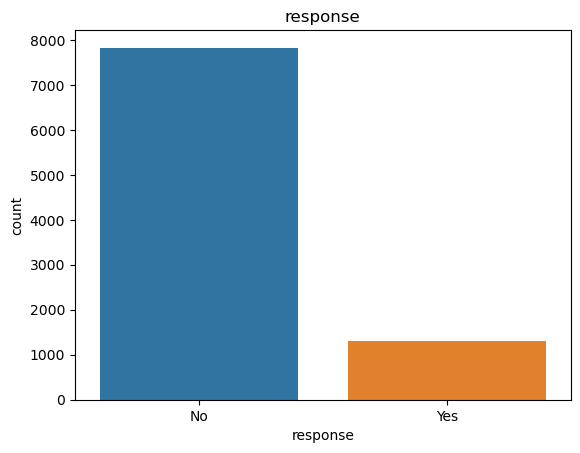

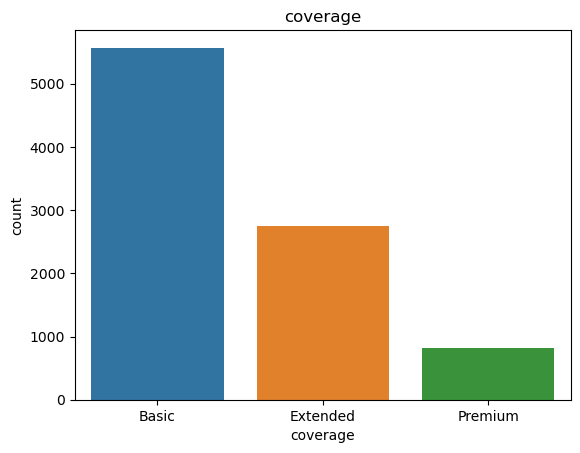

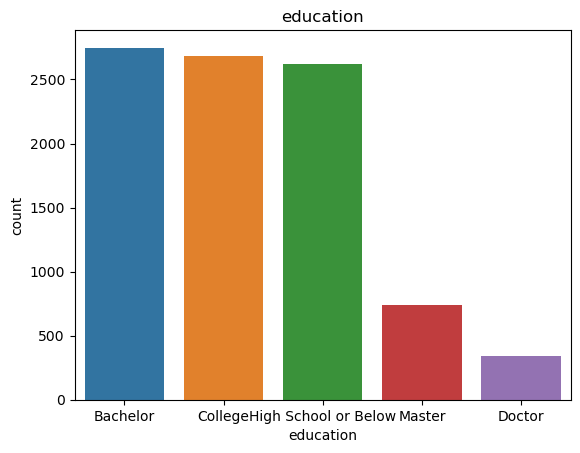

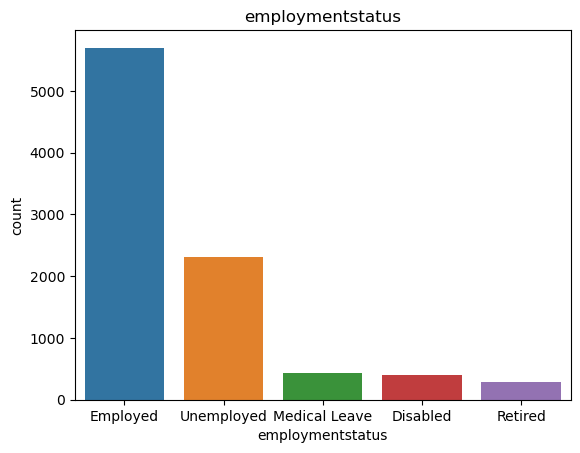

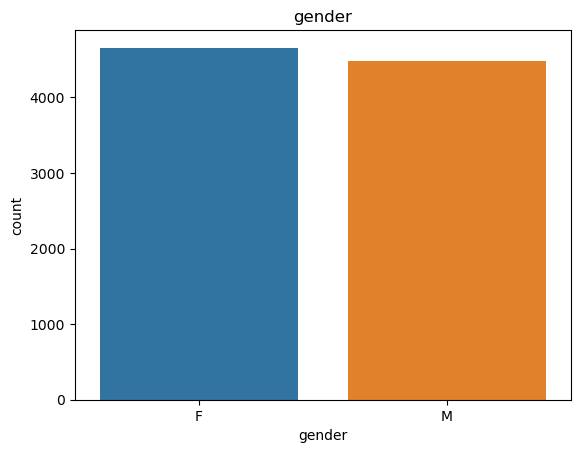

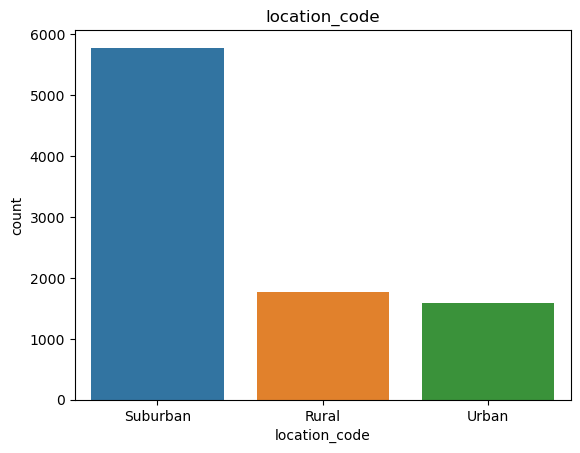

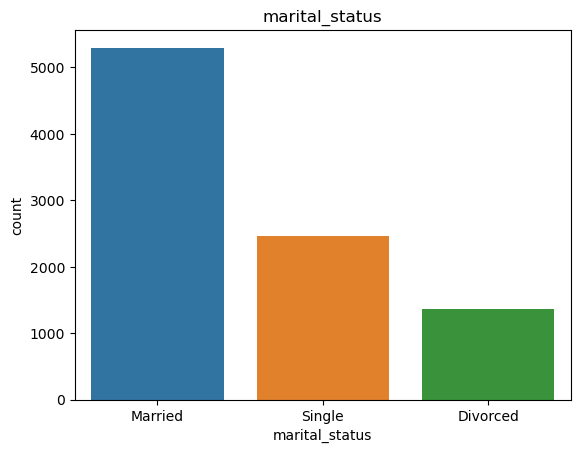

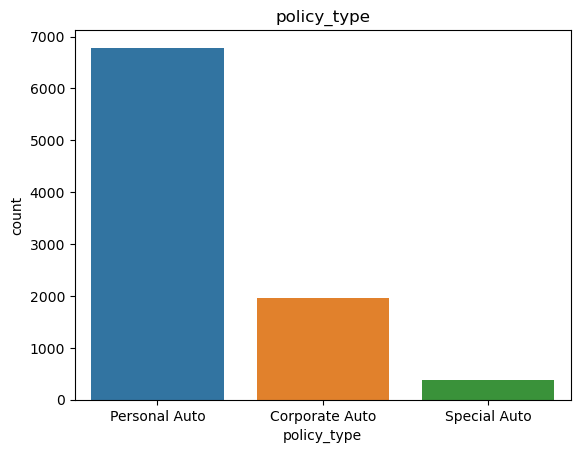

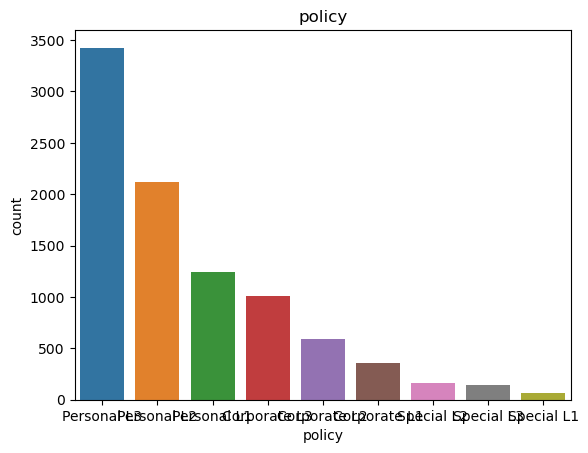

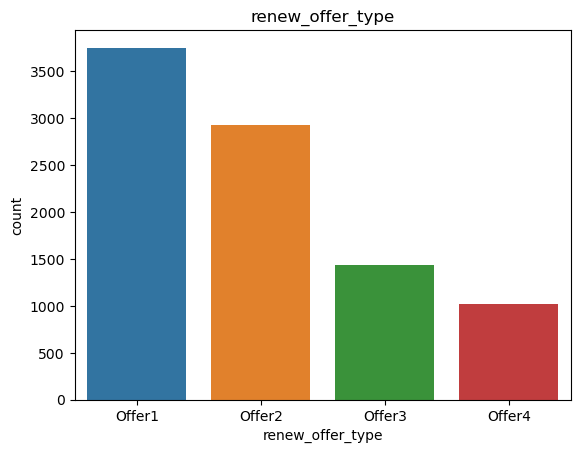

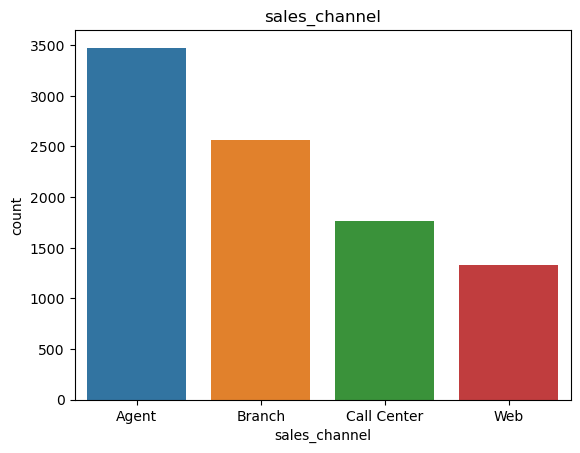

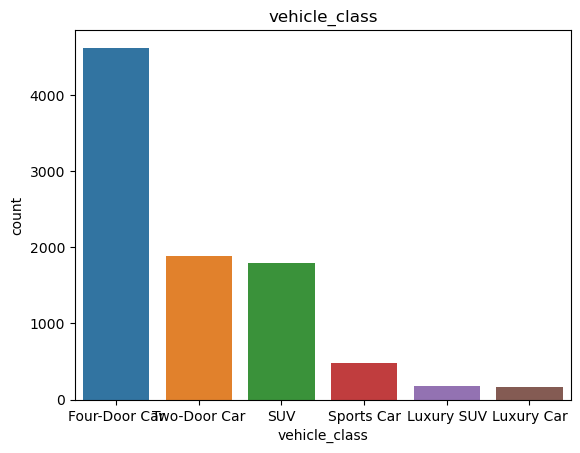

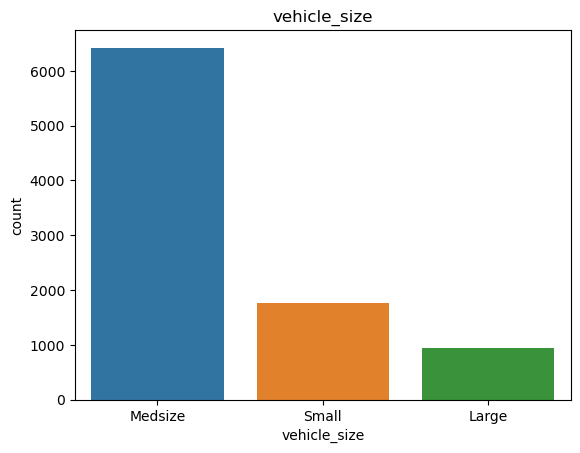

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

def create_countplots(df):
    # Loop through columns in the DataFrame
    for col in df.columns:
        # Check if column is categorical
        if df[col].dtype == 'object' or df[col].nunique() < 6:
            # Create countplot with bars on x-axis
            sns.countplot(x=col, data=df, order=df[col].value_counts().index)
            plt.title(col)
            plt.show()
        else:
            # Create countplot with bars on y-axis
            sns.countplot(y=col, data=df, order=df[col].value_counts().index)
            plt.title(col)
            plt.show()

# Call the function to create countplots for all categorical columns in cat_data
create_countplots(cat_data)

In [19]:
cat_data['policy'].value_counts(dropna=False)

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: policy, dtype: int64

In [20]:
def clean_policy(df):
    cat_data['policy'] = cat_data['policy'].replace({'Corporate L3': 'L3', 'Special L3': 'L3',
                                     'Personal L3' : 'L3', 
                                     'Corporate L2': 'L2', 'Personal L2': 'L2',
                                     'Special L2' : 'L2',
                                     'Corporate L1': 'L1', 'Personal L1': 'L1',
                                     'Special L1': 'L1'})
    return cat_data

In [21]:
clean_policy(cat_data)

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,L1,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,L3,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,L2,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,L2,Offer3,Branch,Four-Door Car,Large


In [22]:
cat_data['policy'].value_counts(dropna=False)

L3    4588
L2    2881
L1    1665
Name: policy, dtype: int64

<AxesSubplot:xlabel='effective_to_date', ylabel='total_claim_amount'>

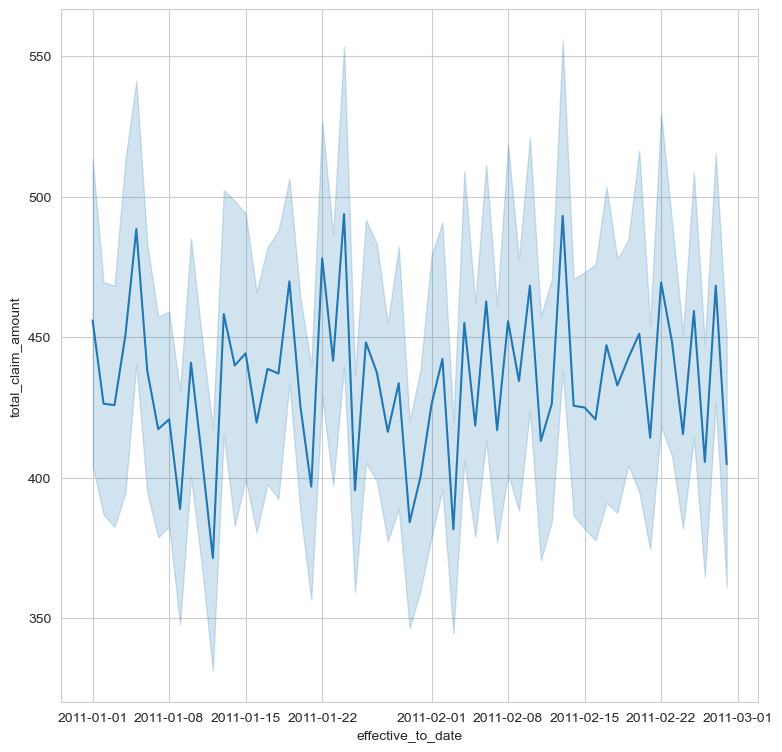

In [23]:
sns.set_style("whitegrid")
plt.figure(figsize=(9, 9))
sns.lineplot(data=data, x="effective_to_date", y="total_claim_amount")

In [24]:
# create a new dataframe with the desired columns
date_df = pd.DataFrame()

# extract the date components
date_df['day'] = data['effective_to_date'].dt.day
date_df['day_name'] = data['effective_to_date'].dt.day_name()
date_df['week'] = data['effective_to_date'].dt.week
date_df['month'] = data['effective_to_date'].dt.month_name()
date_df['total_claim_amount'] = data['total_claim_amount']

date_df

C:\Users\HP\AppData\Local\Temp\ipykernel_11768\2691192399.py:7: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  date_df['week'] = data['effective_to_date'].dt.week


,day,day_name,week,month,total_claim_amount
0,24,Thursday,8,February,384.811147
1,31,Monday,5,January,1131.464935
2,19,Saturday,7,February,566.472247
3,20,Thursday,3,January,529.881344
4,3,Thursday,5,February,138.130879
...,...,...,...,...,...
9129,10,Thursday,6,February,198.234764
9130,12,Saturday,6,February,379.200000
9131,6,Sunday,5,February,790.784983
9132,3,Thursday,5,February,691.200000


In [25]:
# Aggregate total_claim_amount by day_name
total_by_day = date_df.groupby('day_name')['total_claim_amount'].sum().round(2)

# Reorder the index using .reindex()
list_of_correct_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
total_by_day = pd.DataFrame(total_by_day.reindex(index=list_of_correct_days))
total_by_day

,total_claim_amount
day_name,
Monday,655689.71
Tuesday,502518.93
Wednesday,541563.05
Thursday,541820.80
Friday,533658.79
Saturday,608060.10
Sunday,581655.66


<AxesSubplot:xlabel='day_name', ylabel='total_claim_amount'>

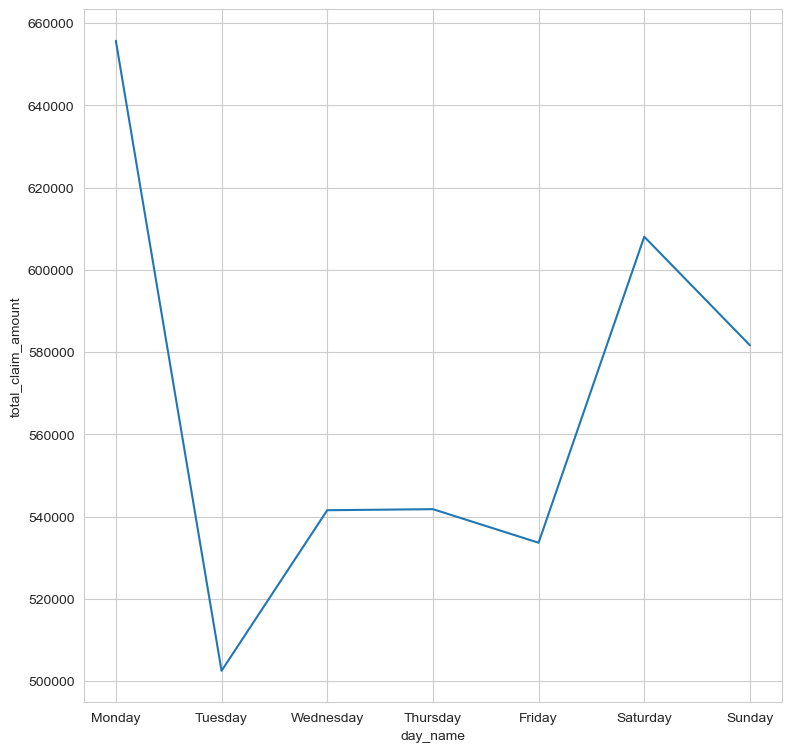

In [26]:
sns.set_style("whitegrid")
plt.figure(figsize=(9, 9))
sns.lineplot(data=total_by_day, x="day_name", y="total_claim_amount")

In [27]:
median_by_day = total_by_day.groupby('day_name')['total_claim_amount'].median()
median_by_day = pd.DataFrame(median_by_day.sort_values(ascending=False))
median_by_day

,total_claim_amount
day_name,
Monday,655689.71
Saturday,608060.10
Sunday,581655.66
Thursday,541820.80
Wednesday,541563.05
Friday,533658.79
Tuesday,502518.93


<AxesSubplot:xlabel='day_name', ylabel='total_claim_amount'>

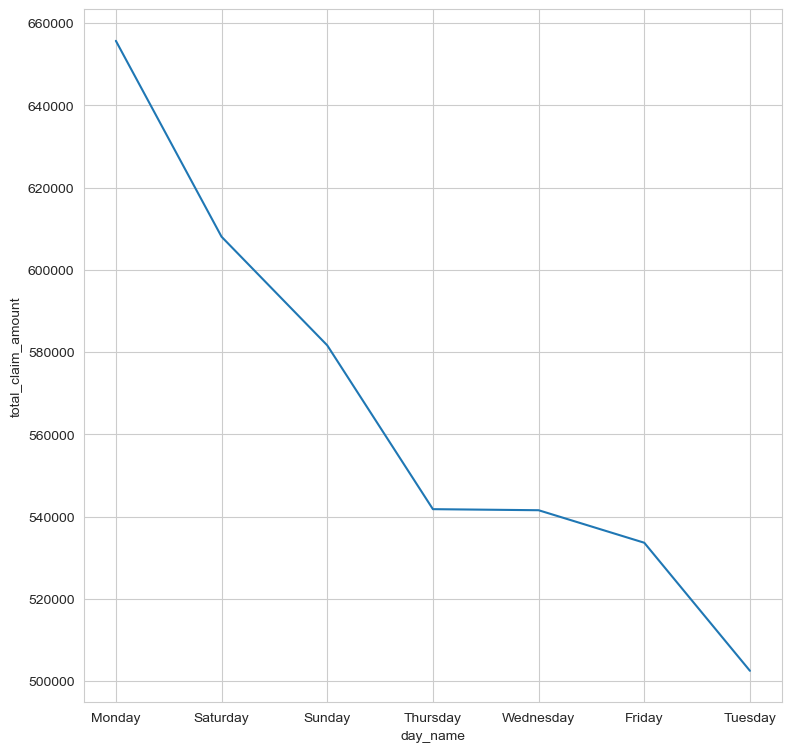

In [28]:
sns.set_style("whitegrid")
plt.figure(figsize=(9, 9))
sns.lineplot(data=median_by_day, x="day_name", y="total_claim_amount")

In [29]:
# Aggregate total_claim_amount by day_name
total_by_month = date_df.groupby('month')['total_claim_amount'].sum().round(2).dropna()

list_of_correct_months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
total_by_month = pd.DataFrame(total_by_month.reindex(index=list_of_correct_months))
total_by_month = total_by_month.sort_values(by='total_claim_amount', ascending=False)
total_by_month

# so much NAs. Not good to work with.

,total_claim_amount
month,
January,2117142.86
February,1847824.19
March,NaN
April,NaN
May,NaN
June,NaN
July,NaN
August,NaN
September,NaN


In [30]:
import pandas as pd
import numpy as np

def remove_outliers(df, thr=3):
    # Loop through each column in the dataframe
    for col in df.columns:
        # Calculate the mean and standard deviation
        col_mean = df[col].mean()
        col_std = df[col].std()

        # Create a boolean mask for the outliers
        outliers_mask = np.abs(df[col] - col_mean) > thr * col_std

        # Replace the outliers with NaN values
        df.loc[outliers_mask, col] = np.nan

    # Drop rows with any NaN values and reset the index
    clean_df = df.dropna().reset_index(drop=True)

    return clean_df

# Example usage
continuous_clean_df = remove_outliers(continuous_df)

In [31]:
continuous_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,total_claim_amount
0,2763.519279,56274.0,69.0,5.0,384.811147
1,6979.535903,0.0,94.0,42.0,1131.464935
2,12887.431650,48767.0,108.0,38.0,566.472247
3,7645.861827,0.0,106.0,65.0,529.881344
4,2813.692575,43836.0,73.0,44.0,138.130879
...,...,...,...,...,...
9129,23405.987980,71941.0,73.0,89.0,198.234764
9130,3096.511217,21604.0,79.0,28.0,379.200000
9131,8163.890428,0.0,85.0,37.0,790.784983
9132,7524.442436,21941.0,96.0,3.0,691.200000


In [32]:
new_data = pd.concat([continuous_clean_df, discrete_df, cat_data, date_df['week']], axis=1)
new_data = new_data.dropna().reset_index(drop=True)
new_data

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,total_claim_amount,months_since_last_claim,number_of_open_complaints,number_of_policies,state,response,...,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,week
0,2763.519279,56274.0,69.0,5.0,384.811147,32,0,1,Washington,No,...,F,Suburban,Married,Corporate Auto,L3,Offer1,Agent,Two-Door Car,Medsize,8
1,6979.535903,0.0,94.0,42.0,1131.464935,13,0,8,Arizona,No,...,F,Suburban,Single,Personal Auto,L3,Offer3,Agent,Four-Door Car,Medsize,5
2,12887.431650,48767.0,108.0,38.0,566.472247,18,0,2,Nevada,No,...,F,Suburban,Married,Personal Auto,L3,Offer1,Agent,Two-Door Car,Medsize,7
3,7645.861827,0.0,106.0,65.0,529.881344,18,0,7,California,No,...,M,Suburban,Married,Corporate Auto,L2,Offer1,Call Center,SUV,Medsize,3
4,2813.692575,43836.0,73.0,44.0,138.130879,12,0,1,Washington,No,...,M,Rural,Single,Personal Auto,L1,Offer1,Agent,Four-Door Car,Medsize,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8665,23405.987980,71941.0,73.0,89.0,198.234764,21,1,6,California,No,...,M,Suburban,Married,Corporate Auto,L2,Offer1,Web,Four-Door Car,Medsize,2
8666,3096.511217,21604.0,79.0,28.0,379.200000,25,0,1,California,No,...,F,Rural,Married,Personal Auto,L2,Offer2,Branch,Four-Door Car,Medsize,4
8667,8163.890428,0.0,85.0,37.0,790.784983,23,0,1,California,No,...,M,Suburban,Single,Corporate Auto,L3,Offer2,Call Center,Two-Door Car,Small,6
8668,7524.442436,21941.0,96.0,3.0,691.200000,11,0,6,California,No,...,M,Suburban,Single,Personal Auto,L2,Offer3,Agent,Four-Door Car,Medsize,1


In [33]:
new_data = new_data.reindex(columns=['customer_lifetime_value', 'income', 'monthly_premium_auto',
                         'months_since_policy_inception', 'months_since_last_claim', 
                         'number_of_open_complaints', 'number_of_policies', 'state',
                         'response', 'coverage', 'education', 'employmentstatus', 'gender',
                         'location_code', 'marital_status', 'policy', 'renew_offer_type',
                         'sales_channel', 'vehicle_class', 'vehicle_size', 'week', 
                         'total_claim_amount'])
new_data

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,months_since_last_claim,number_of_open_complaints,number_of_policies,state,response,coverage,...,gender,location_code,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,week,total_claim_amount
0,2763.519279,56274.0,69.0,5.0,32,0,1,Washington,No,Basic,...,F,Suburban,Married,L3,Offer1,Agent,Two-Door Car,Medsize,8,384.811147
1,6979.535903,0.0,94.0,42.0,13,0,8,Arizona,No,Extended,...,F,Suburban,Single,L3,Offer3,Agent,Four-Door Car,Medsize,5,1131.464935
2,12887.431650,48767.0,108.0,38.0,18,0,2,Nevada,No,Premium,...,F,Suburban,Married,L3,Offer1,Agent,Two-Door Car,Medsize,7,566.472247
3,7645.861827,0.0,106.0,65.0,18,0,7,California,No,Basic,...,M,Suburban,Married,L2,Offer1,Call Center,SUV,Medsize,3,529.881344
4,2813.692575,43836.0,73.0,44.0,12,0,1,Washington,No,Basic,...,M,Rural,Single,L1,Offer1,Agent,Four-Door Car,Medsize,5,138.130879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8665,23405.987980,71941.0,73.0,89.0,21,1,6,California,No,Basic,...,M,Suburban,Married,L2,Offer1,Web,Four-Door Car,Medsize,2,198.234764
8666,3096.511217,21604.0,79.0,28.0,25,0,1,California,No,Basic,...,F,Rural,Married,L2,Offer2,Branch,Four-Door Car,Medsize,4,379.200000
8667,8163.890428,0.0,85.0,37.0,23,0,1,California,No,Extended,...,M,Suburban,Single,L3,Offer2,Call Center,Two-Door Car,Small,6,790.784983
8668,7524.442436,21941.0,96.0,3.0,11,0,6,California,No,Basic,...,M,Suburban,Single,L2,Offer3,Agent,Four-Door Car,Medsize,1,691.200000


In [34]:
new_data['response'].unique()

array(['No', 'Yes'], dtype=object)

In [35]:
new_data['response'] = new_data['response'].replace({'Yes': 1, 'No': 0})

In [36]:
new_data['education'] = new_data['education'].replace({'Master': 'Graduate', 'Doctor': 'Graduate'})
new_data['education'].unique()

array(['Bachelor', 'College', 'Graduate', 'High School or Below'],
      dtype=object)

In [37]:
new_data['employmentstatus'] = new_data['employmentstatus'].replace({'Medical Leave': 'Inactive', 'Disabled': 'Inactive', 'Retired': 'Inactive'})
new_data['employmentstatus'].unique()

array(['Employed', 'Unemployed', 'Inactive'], dtype=object)

In [38]:
new_data['gender'].unique()
new_data['gender'] = new_data['gender'].replace({'F': 1, 'M': 0})

In [39]:
new_data['gender'].unique()

array([1, 0], dtype=int64)

In [40]:
new_data['vehicle_class'].replace(['Sports Car', 'Luxury SUV', 'Luxury Car'], 'Luxury', inplace=True)
new_data['vehicle_class'].unique()

array(['Two-Door Car', 'Four-Door Car', 'SUV', 'Luxury'], dtype=object)

In [41]:
new_data['coverage'] = new_data['coverage'].replace({'Basic': 1,'Extended': 2,'Premium': 3})

In [42]:
new_data['employmentstatus'] = new_data['employmentstatus'].replace({'Unemployed': 1,'Inactive': 2,'Employed': 3})

In [43]:
new_data['location_code'] = new_data['location_code'].replace({'Rural': 1,'Suburban': 2,'Urban': 3})

In [44]:
new_data['vehicle_size'] = new_data['vehicle_size'].replace({'Small': 1,'Medsize': 2,'Large': 3})

In [45]:
display(new_data['coverage'].unique())
display(new_data['employmentstatus'].unique())
display(new_data['location_code'].unique())
display(new_data['vehicle_size'].unique())

array([1, 2, 3], dtype=int64)

array([3, 1, 2], dtype=int64)

array([2, 1, 3], dtype=int64)

array([2, 1, 3], dtype=int64)

In [46]:
new_data

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,months_since_last_claim,number_of_open_complaints,number_of_policies,state,response,coverage,...,gender,location_code,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,week,total_claim_amount
0,2763.519279,56274.0,69.0,5.0,32,0,1,Washington,0,1,...,1,2,Married,L3,Offer1,Agent,Two-Door Car,2,8,384.811147
1,6979.535903,0.0,94.0,42.0,13,0,8,Arizona,0,2,...,1,2,Single,L3,Offer3,Agent,Four-Door Car,2,5,1131.464935
2,12887.431650,48767.0,108.0,38.0,18,0,2,Nevada,0,3,...,1,2,Married,L3,Offer1,Agent,Two-Door Car,2,7,566.472247
3,7645.861827,0.0,106.0,65.0,18,0,7,California,0,1,...,0,2,Married,L2,Offer1,Call Center,SUV,2,3,529.881344
4,2813.692575,43836.0,73.0,44.0,12,0,1,Washington,0,1,...,0,1,Single,L1,Offer1,Agent,Four-Door Car,2,5,138.130879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8665,23405.987980,71941.0,73.0,89.0,21,1,6,California,0,1,...,0,2,Married,L2,Offer1,Web,Four-Door Car,2,2,198.234764
8666,3096.511217,21604.0,79.0,28.0,25,0,1,California,0,1,...,1,1,Married,L2,Offer2,Branch,Four-Door Car,2,4,379.200000
8667,8163.890428,0.0,85.0,37.0,23,0,1,California,0,2,...,0,2,Single,L3,Offer2,Call Center,Two-Door Car,1,6,790.784983
8668,7524.442436,21941.0,96.0,3.0,11,0,6,California,0,1,...,0,2,Single,L2,Offer3,Agent,Four-Door Car,2,1,691.200000


In [47]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8670 entries, 0 to 8669
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_lifetime_value        8670 non-null   float64
 1   income                         8670 non-null   float64
 2   monthly_premium_auto           8670 non-null   float64
 3   months_since_policy_inception  8670 non-null   float64
 4   months_since_last_claim        8670 non-null   int64  
 5   number_of_open_complaints      8670 non-null   int64  
 6   number_of_policies             8670 non-null   int64  
 7   state                          8670 non-null   object 
 8   response                       8670 non-null   int64  
 9   coverage                       8670 non-null   int64  
 10  education                      8670 non-null   object 
 11  employmentstatus               8670 non-null   int64  
 12  gender                         8670 non-null   i

In [48]:
# Identify the categorical nominal columns
categorical_nominal_cols = []
for col in new_data.columns:
    if new_data[col].dtype == object and new_data[col].nunique() < 10:
        categorical_nominal_cols.append(col)

# Create a new dataframe with the categorical nominal columns
categorical_nominal_data = new_data[categorical_nominal_cols]

categorical_nominal_data

,state,education,marital_status,policy,renew_offer_type,sales_channel,vehicle_class
0,Washington,Bachelor,Married,L3,Offer1,Agent,Two-Door Car
1,Arizona,Bachelor,Single,L3,Offer3,Agent,Four-Door Car
2,Nevada,Bachelor,Married,L3,Offer1,Agent,Two-Door Car
3,California,Bachelor,Married,L2,Offer1,Call Center,SUV
4,Washington,Bachelor,Single,L1,Offer1,Agent,Four-Door Car
...,...,...,...,...,...,...,...
8665,California,College,Married,L2,Offer1,Web,Four-Door Car
8666,California,Graduate,Married,L2,Offer2,Branch,Four-Door Car
8667,California,High School or Below,Single,L3,Offer2,Call Center,Two-Door Car
8668,California,High School or Below,Single,L2,Offer3,Agent,Four-Door Car


In [49]:
# create a list of the categorical nominal columns
categorical_nominal_cols = ['state', 'response', 'education', 'employmentstatus', 'gender', 'marital_status', 'policy', 'renew_offer_type', 'sales_channel', 'vehicle_class']

# create a list of named levels
levels = []

# loop through each categorical nominal column and get its unique values
for col in categorical_nominal_cols:
    unique_vals = new_data[col].unique()
    levels.append(list(unique_vals))

print(levels)

[['Washington', 'Arizona', 'Nevada', 'California', 'Oregon'], [0, 1], ['Bachelor', 'College', 'Graduate', 'High School or Below'], [3, 1, 2], [1, 0], ['Married', 'Single', 'Divorced'], ['L3', 'L2', 'L1'], ['Offer1', 'Offer3', 'Offer2', 'Offer4'], ['Agent', 'Call Center', 'Web', 'Branch'], ['Two-Door Car', 'Four-Door Car', 'SUV', 'Luxury']]


In [50]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first', categories='levels')

In [51]:
levels

[['Washington', 'Arizona', 'Nevada', 'California', 'Oregon'],
 [0, 1],
 ['Bachelor', 'College', 'Graduate', 'High School or Below'],
 [3, 1, 2],
 [1, 0],
 ['Married', 'Single', 'Divorced'],
 ['L3', 'L2', 'L1'],
 ['Offer1', 'Offer3', 'Offer2', 'Offer4'],
 ['Agent', 'Call Center', 'Web', 'Branch'],
 ['Two-Door Car', 'Four-Door Car', 'SUV', 'Luxury']]

Comparing Regression Models